# Customer Transaction Prediction
# 1. Overview

This document provides an in-depth analysis of the dataset used for customer transaction prediction. The dataset consists of 200 features, all unnamed, with no null values. Additionally, there is one unnecessary column that needs to be removed. The main objective of this analysis is to clean, preprocess, and explore the dataset to derive meaningful insights before building a predictive model.

#### Objective

The goal of this project is to predict customer transactions based on historical data. The dataset includes multiple features that could potentially influence transaction behavior. The analysis will focus on:

* Data cleaning and preprocessing

* Understanding feature distributions

* Identifying relationships and correlations

* Selecting the most relevant features for model training

#### Dataset Overview

* Number of Features: 200 (Unnamed)

* Missing Values: None

* Unnecessary Column: One (Needs removal)



# 2.Importing Dependencies

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report

# 3. Loading the Dataset

In [3]:
file_path = "train(1).csv"  # Replace with the actual filename


In [4]:
data=pd.read_csv("train(1).csv")

# 4.Preview of Dataset

In [5]:
data.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [6]:
data.tail()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
147167,train_147167,1,10.2747,-4.1386,12.7503,12.7069,9.1189,-13.1444,4.8053,12.1899,...,0.2335,10.1511,3.3560,3.6797,16.5746,-2.0280,11.1852,7.9372,16.0633,-10.7509
147168,train_147168,0,11.6822,1.3545,12.9709,9.7781,13.0540,10.8053,5.6158,18.3404,...,10.7386,10.2882,4.2028,-3.6363,21.3374,0.9606,-2.7796,9.3843,19.6951,10.5360
147169,train_147169,1,10.6172,-0.3740,16.9193,3.1870,11.2683,-13.7106,4.7575,15.4762,...,5.1849,13.8197,0.6771,-2.1955,22.0307,-2.5751,5.2742,7.8619,19.7658,-11.5516
147170,train_147170,1,7.9748,-5.1107,12.1986,8.3708,8.7133,-1.3001,5.6227,13.7187,...,13.0599,5.6221,3.7788,-0.1180,12.7282,-0.7006,-5.5177,10.8651,15.4476,2.9905
147171,train_147171,0,12.0854,-9.7421,8.9482,4.3382,9.0748,0.6823,5.9163,14.2065,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 5. Data Structure

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147172 entries, 0 to 147171
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 226.8+ MB


In [8]:
data.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,147172.000000,147172.000000,147172.000000,147172.000000,147172.000000,147172.000000,147172.000000,147172.000000,147172.000000,147172.000000,...,147171.000000,147171.000000,147171.000000,147171.000000,147171.000000,147171.000000,147171.000000,147171.000000,147171.000000,147171.000000
mean,0.100169,10.674719,-1.631966,10.711376,6.796100,11.080364,-5.081230,5.408139,16.558210,0.285717,...,3.226486,7.438733,1.929432,3.330578,17.992603,-0.142142,2.285988,8.911249,15.873664,-3.334805
std,0.300226,3.038629,4.055097,2.638597,2.044310,1.621716,7.848227,0.866029,3.415053,3.333512,...,4.558239,3.020193,1.475979,3.991447,3.136461,1.427833,5.454425,0.922189,3.010542,10.441751
min,0.000000,0.452800,-15.043400,2.117100,-0.040200,5.277800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.020400,5.960600,6.299300,-38.852800
25%,0.000000,8.451000,-4.751550,8.719800,5.252200,9.886400,-11.205375,4.769600,13.956800,-2.314800,...,-0.066100,5.157400,0.893300,0.579050,15.624700,-1.165050,-1.979350,8.254450,13.834450,-11.244350
50%,0.000000,10.522800,-1.615350,10.576150,6.824900,11.111750,-4.841950,5.385400,16.474600,0.389900,...,3.191700,7.351500,1.904200,3.391700,17.957600,-0.173200,2.389300,8.892000,15.940600,-2.827100
75%,0.000000,12.750600,1.358500,12.510700,8.326825,12.262100,0.897425,6.001400,19.110450,2.941600,...,6.397900,9.508500,2.949900,6.208450,20.396400,0.825600,6.542000,9.596400,18.065100,4.835100
max,1.000000,20.315000,10.335600,18.652100,13.188300,16.671400,17.251600,8.447700,27.638900,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,27.534000


# 6.Checking Missing Values

In [ ]:
print(data.isna().sum().sum())  # Data has no missing values

0


# 7.EDA

##### Checking Class Imbalance

<ipython-input-9-fc6b1857e864>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='target', data=data, palette=['blue', 'orange'])


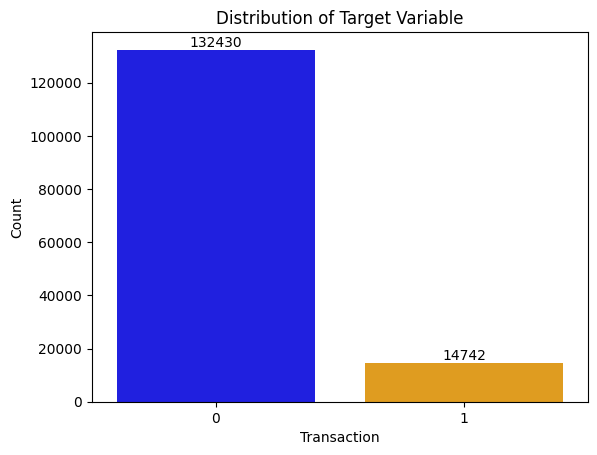

In [9]:
ax = sns.countplot(x='target', data=data, palette=['blue', 'orange'])
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.title('Distribution of Target Variable')
plt.xlabel('Transaction')
plt.ylabel('Count')
plt.show()

##### Checking for Outliers

In [10]:
data1=data[["var_54","var_88","var_91","var_79","var_100"]]  #Checking outliers with random selection of features

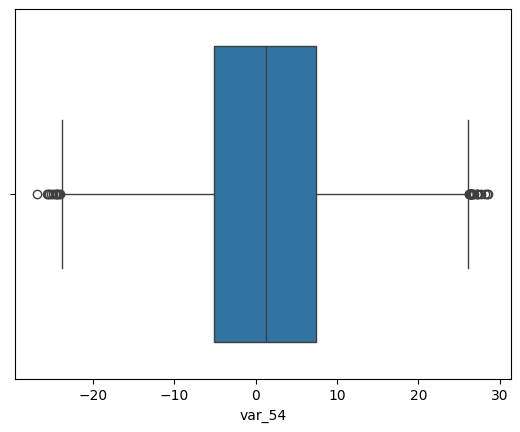

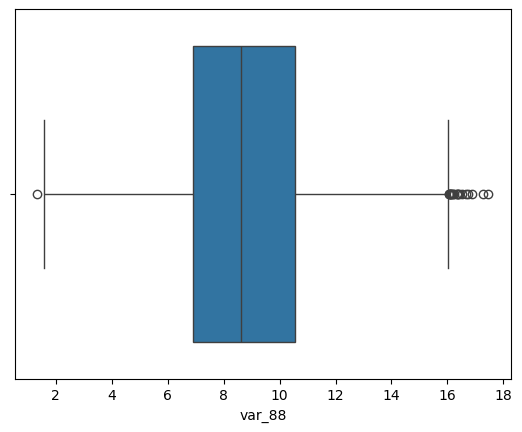

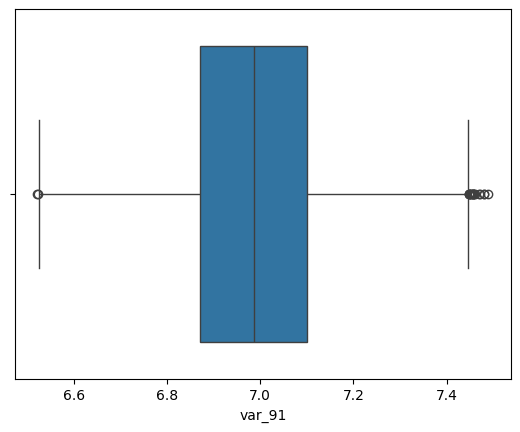

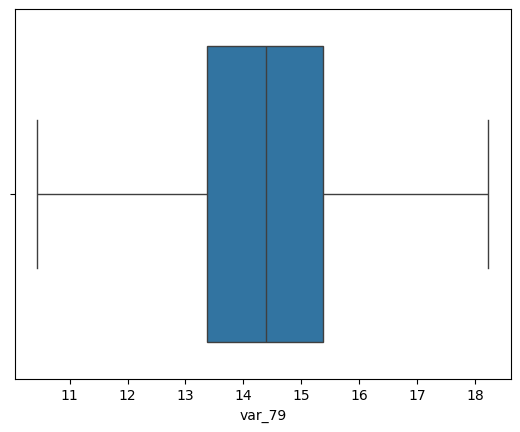

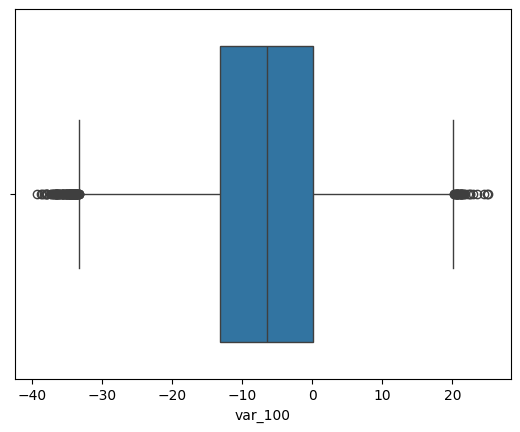

In [11]:
for i in data1.columns:
    sns.boxplot(data=data1,x=i)
    plt.show()

In [12]:
dropped_col=data["target"]

In [13]:
data.drop(columns=["target"],inplace=True)

In [14]:


def replace_outliers_with_median(df):
    """
    Replace outliers in a DataFrame with the median using the IQR method.

    Parameters:
        df (pd.DataFrame): The input DataFrame

    Returns:
        pd.DataFrame: DataFrame with outliers replaced by median
    """
    df_cleaned = df.copy()  # Create a copy to avoid modifying the original data

    for col in df_cleaned.select_dtypes(include=[np.number]):  # Apply only to numeric columns
        Q1 = df_cleaned[col].quantile(0.25)  # First quartile (25th percentile)
        Q3 = df_cleaned[col].quantile(0.75)  # Third quartile (75th percentile)
        IQR = Q3 - Q1  # Interquartile range

        lower_bound = Q1 - 1.5 * IQR  # Lower bound
        upper_bound = Q3 + 1.5 * IQR  # Upper bound

        # Replace outliers with the median
        median_value = df_cleaned[col].median()
        df_cleaned[col] = np.where((df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound),
                                   median_value, df_cleaned[col])

    return df_cleaned


In [15]:
data2=replace_outliers_with_median(data)

In [16]:
data2

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147167,train_147167,10.2747,-4.1386,12.7503,12.7069,9.1189,-13.1444,4.8053,12.1899,1.6231,...,0.2335,10.1511,3.3560,3.6797,16.5746,-2.0280,11.1852,7.9372,16.0633,-10.7509
147168,train_147168,11.6822,1.3545,12.9709,9.7781,13.0540,10.8053,5.6158,18.3404,0.4690,...,10.7386,10.2882,4.2028,-3.6363,21.3374,0.9606,-2.7796,9.3843,19.6951,10.5360
147169,train_147169,10.6172,-0.3740,16.9193,3.1870,11.2683,-13.7106,4.7575,15.4762,-2.9331,...,5.1849,13.8197,0.6771,-2.1955,22.0307,-2.5751,5.2742,7.8619,19.7658,-11.5516
147170,train_147170,7.9748,-5.1107,12.1986,8.3708,8.7133,-1.3001,5.6227,13.7187,0.5594,...,13.0599,5.6221,3.7788,-0.1180,12.7282,-0.7006,-5.5177,10.8651,15.4476,2.9905


In [17]:
data1=data2[["var_54","var_88","var_91","var_79","var_100"]]  #Checking outliers with random selection of features

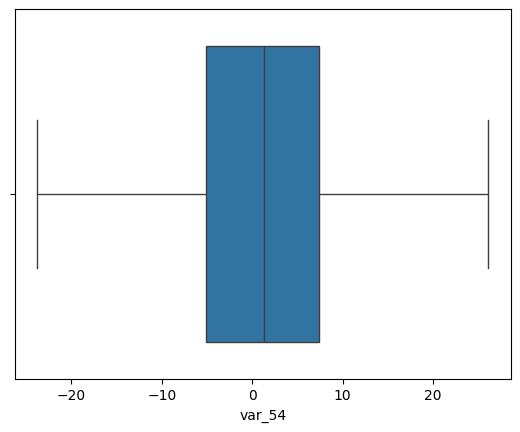

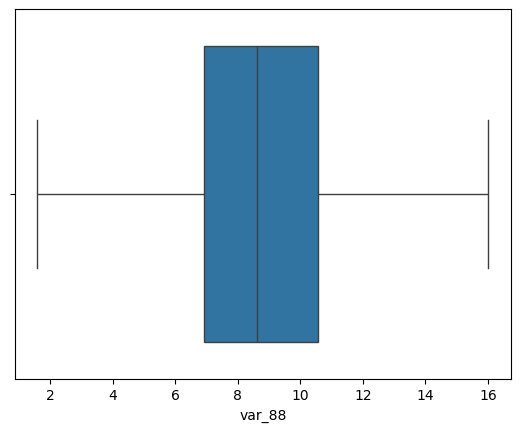

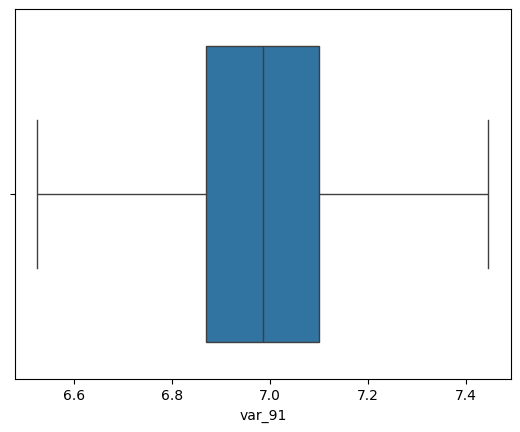

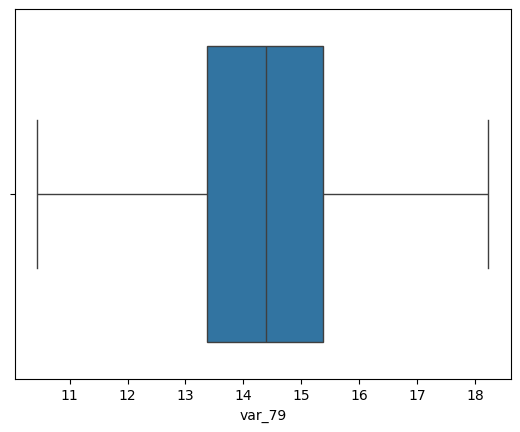

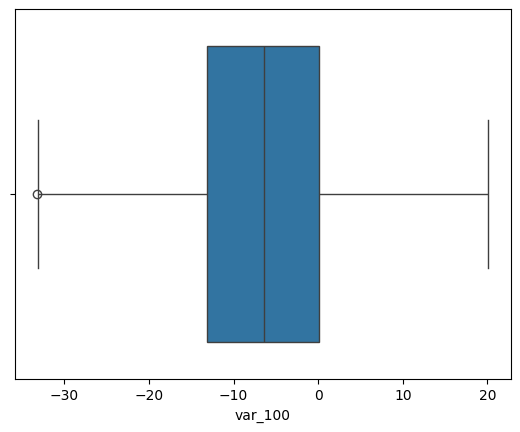

In [18]:
for i in data1.columns:
    sns.boxplot(data=data1,x=i)
    plt.show()

In [19]:
data2=data2.join(dropped_col)

In [20]:
data2["target"].unique()

array([0, 1])

In [21]:
data2.drop(columns=["ID_code"],inplace=True)

# 8.Splitting the data into training and testing sets

In [22]:
#data2.drop(columns=["ID_code"],inplace=True) # Dropping unnecessary column

In [23]:
X=data2.drop(columns=["target"])

In [24]:
y=data2["target"]

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [27]:
X_train.shape

(117737, 200)

In [28]:
X_test.shape

(29435, 200)

# 9. Data Pre-Processing

In [29]:
undersampler = RandomUnderSampler(random_state=42,sampling_strategy=0.3)

In [30]:
X_train_resampled,y_train_resampled=undersampler.fit_resample(X_train,y_train)

In [31]:
from sklearn.preprocessing import StandardScaler

In [32]:
scaler=StandardScaler() # Used to Scale the data

In [33]:

scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)


In [34]:
from collections import Counter


In [35]:
print("Before Undersampling:", Counter(y_train))
print("After Undersampling:", Counter(y_train_resampled))

Before Undersampling: Counter({0: 105984, 1: 11753})
After Undersampling: Counter({0: 39176, 1: 11753})


In [36]:
from sklearn.decomposition import PCA


In [37]:
pca = PCA(n_components=111)
X_train_resampled = pca.fit_transform(X_train_resampled)
X_test = pca.transform(X_test)

# 10.Classification Models

# 10.1 ANN

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

In [39]:
ann_model=keras.Sequential([
    keras.layers.Dense(64,activation='relu',input_shape=(111,)),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32,activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
ann_model.compile(optimizer=Adam(learning_rate=0.01),loss="binary_crossentropy",metrics=["accuracy",Precision(),Recall()])

In [41]:
ann=ann_model.fit(X_train_resampled,y_train_resampled,epochs=20,verbose=2,validation_split=0.2)

Epoch 1/20
1274/1274 - 6s - 5ms/step - accuracy: 0.9612 - loss: 0.1556 - precision: 0.2941 - recall: 0.0064 - val_accuracy: 0.0559 - val_loss: 2.5422 - val_precision: 1.0000 - val_recall: 0.0559
Epoch 2/20
1274/1274 - 5s - 4ms/step - accuracy: 0.9612 - loss: 0.1437 - precision: 0.4474 - recall: 0.0325 - val_accuracy: 0.0211 - val_loss: 2.4233 - val_precision: 1.0000 - val_recall: 0.0211
Epoch 3/20
1274/1274 - 5s - 4ms/step - accuracy: 0.9611 - loss: 0.1421 - precision: 0.4317 - recall: 0.0383 - val_accuracy: 0.0526 - val_loss: 2.5248 - val_precision: 1.0000 - val_recall: 0.0526
Epoch 4/20
1274/1274 - 4s - 3ms/step - accuracy: 0.9619 - loss: 0.1394 - precision: 0.5350 - recall: 0.0683 - val_accuracy: 0.0182 - val_loss: 2.6758 - val_precision: 1.0000 - val_recall: 0.0182
Epoch 5/20
1274/1274 - 4s - 3ms/step - accuracy: 0.9613 - loss: 0.1408 - precision: 0.4751 - recall: 0.0549 - val_accuracy: 0.0015 - val_loss: 2.9951 - val_precision: 1.0000 - val_recall: 0.0015
Epoch 6/20
1274/1274 - 5s

# 10.2 Logistic Regression

In [42]:
LR = LogisticRegression()
LR_model = LR.fit(X_train_resampled, y_train_resampled)

In [43]:
y_pred_lr=LR_model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score

In [45]:
print("accuracy score:",accuracy_score(y_test,y_pred_lr))
print("f1 score:",f1_score(y_test,y_pred_lr))
print("precision score:",precision_score(y_test,y_pred_lr))
print("recall score:",recall_score(y_test,y_pred_lr))

accuracy score: 0.8956004756242568
f1 score: 0.4889406286379511
precision score: 0.4861111111111111
recall score: 0.4918032786885246


# 10.3 Decision Tree

In [46]:
dt=DecisionTreeClassifier(min_samples_leaf=15,min_samples_split=2,max_depth=20,criterion='gini',splitter='best')

In [47]:
dt_model=dt.fit(X_train_resampled,y_train_resampled)

In [48]:
y_pred_dt=dt_model.predict(X_test)

In [49]:
print("accuracy score:",accuracy_score(y_test,y_pred_dt))
print("f1 score:",f1_score(y_test,y_pred_dt))
print("precision score:",precision_score(y_test,y_pred_dt))
print("recall score:",recall_score(y_test,y_pred_dt))

accuracy score: 0.8552063869543061
f1 score: 0.40123630233211577
precision score: 0.34584645192540564
recall score: 0.477751756440281


# 10.4 Random Forest

In [50]:
rf = RandomForestClassifier(
    n_estimators=150,        # Number of trees in the forest (you can tune this)
    min_samples_split=10,     # Minimum samples required to split an internal node
    min_samples_leaf=4,       # Minimum samples required to be at a leaf node
    max_features='sqrt',     # Number of features to consider for the best split
    bootstrap=True,          # Use bootstrap sampling for better generalization
    n_jobs=-1,               # Use all available CPUs for faster training
    random_state=42          # For reproducibility
)

In [51]:
rf_model=rf.fit(X_train_resampled,y_train_resampled)

In [52]:
y_pred_rf=rf_model.predict(X_test)

In [53]:
print("accuracy score:",accuracy_score(y_test,y_pred_rf))
print("f1 score:",f1_score(y_test,y_pred_rf))
print("precision score:",precision_score(y_test,y_pred_rf))
print("recall score:",recall_score(y_test,y_pred_rf))

accuracy score: 0.896653643621539
f1 score: 0.4931689436854382
precision score: 0.49120477928974443
recall score: 0.49514887922382067


# 10.5 XG BOOST

In [54]:
from xgboost import XGBClassifier

In [55]:
xgb=XGBClassifier(n_estimators=150,max_depth=8,learning_rate=0.01)

In [56]:
xgb_model = xgb.fit(X_train_resampled, y_train_resampled)

In [57]:
y_pred_xgb=xgb_model.predict(X_test)

In [58]:
print("accuracy score:",accuracy_score(y_test,y_pred_xgb))
print("f1 score:",f1_score(y_test,y_pred_xgb))
print("precision score:",precision_score(y_test,y_pred_xgb))
print("recall score:",recall_score(y_test,y_pred_xgb))

accuracy score: 0.9053167997282147
f1 score: 0.46310922750915046
precision score: 0.5458673932788374
recall score: 0.4021411843425895


# 10.6 K Nearest Neighbour

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn=KNeighborsClassifier(n_neighbors=3)

In [64]:
knn_model=knn.fit(X_train_resampled,y_train_resampled)

In [66]:
y_pred_knn=knn_model.predict(X_test)

In [67]:
print("accuracy score:",accuracy_score(y_test,y_pred_knn))
print("f1 score:",f1_score(y_test,y_pred_knn))
print("precision score:",precision_score(y_test,y_pred_knn))
print("recall score:",recall_score(y_test,y_pred_knn))

accuracy score: 0.8833021912688975
f1 score: 0.13888192529456003
precision score: 0.277
recall score: 0.09267313482770158


# 10.7 SVM

In [61]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', class_weight='balanced', random_state=42)

In [63]:
svm_rbf.fit(X_train_resampled, y_train_resampled)

SVC(class_weight='balanced', random_state=42)

In [65]:
y_pred_rbf = svm_rbf.predict(X_test)

In [68]:
print("Accuracy Score:", accuracy_score(y_test, y_pred_rbf))
print("F1 Score:", f1_score(y_test, y_pred_rbf))
print("Precision Score:", precision_score(y_test, y_pred_rbf))
print("Recall Score:", recall_score(y_test, y_pred_rbf))

Accuracy Score: 0.833769322235434
F1 Score: 0.45384529523384304
Precision Score: 0.340536013400335
Recall Score: 0.6801605888256942


# 11.Model Comparison Report

This report compares the performance of six machine learning models: Logistic Regression, Decision Tree, Random Forest, XGBoost, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM). The evaluation metrics used for comparison include Accuracy Score, F1 Score, Recall, and Precision.

Model Comparison Metrics

### a) Logistic Regression

* Accuracy Score: 89.56%
* F1 Score: 48.89%
* Recall: 49.18%
* Precision: 48.61%

### b) Decision Tree (DT)

* Accuracy Score: 85.52%
* F1 Score: 40.12%
* Recall: 47.77%
* Precision: 34.58%

### c) Random Forest (RF)

* Accuracy Score: 89.66%
* F1 Score: 49.31 %
* Recall: 49.51 %
* Precision: 49.12%

### d) XGBoost

* Accuracy Score: 90.53%
* F1 Score: 46.31%
* Recall: 40.21%
* Precision: 54.58%

### e) K-Nearest Neighbors (KNN)

* Accuracy Score: 88.33%
* F1 Score: 13.88%
* Recall: 9.265
* Precision: 27.77%

### f) Support Vector Machine (SVM)

* Accuracy Score: 83.37$
* F1 Score: 45.38%
* Recall: 68.01 %
* Precision: 34.05%

### g) ANN
* Acuuracy Score:96.4%
* F1 Score:20.34%
* Recall Score:12.51%
* Precision Score:67.59%



### Analysis
* Accuracy Score: This metric evaluates how often the model's predictions are correct. A higher accuracy score means better overall performance.

* F1 Score: The F1 score is the harmonic mean of Precision and Recall. It is particularly useful for imbalanced datasets as it considers both false positives and false negatives.

* Recall: This metric measures the ability of the model to identify all relevant instances (True Positives). A higher recall means the model has fewer false negatives.

* Precision: Precision indicates the ability of the model to avoid false positives. A higher precision means that the model has fewer false positives among the predicted positives.




# 12 Challenges Faced

1. Handling Large Dataset Size:
The massive size of the dataset caused performance issues, such as memory constraints and slow processing times. Managing and processing such a large volume of data efficiently proved to be a significant challenge.

2. Unknown Feature Names
The absence of clear feature names made it difficult to interpret and understand the relationships between features and the target variable. This added complexity to the data exploration and model development phases.

3. Time-Consuming Data Preprocessing
Preprocessing the large dataset, including cleaning, normalization, and handling missing values, was a time-consuming task. The lack of known feature names made this even more challenging, as it was unclear how to treat certain features appropriately.

4. Imbalanced Dataset
The dataset was imbalanced, with a disproportionate number of transactions in the majority class compared to the minority class. This imbalance led to biased predictions, especially for rare events like fraudulent transactions.

5. Complex Feature Engineering
Identifying important features for prediction was difficult due to unclear feature names. This made the process of feature extraction and creation more complicated and time-consuming.

6. Model Selection Challenges
Choosing the right machine learning model for a large dataset with unknown feature relationships was challenging. Not all models performed well, and determining which model was most suitable required extensive experimentation.

7. Extended Model Training Time
Due to the large dataset size, model training took longer, which required careful consideration of computational resources. This led to longer development cycles and delayed results.

8. Risk of Overfitting or Underfitting
There was a risk of overfitting with complex models, while simpler models might have underfitted the data. Striking the right balance between model complexity and performance was a significant challenge.



# 13. Conclusion

The comparison of models—Logistic Regression, Decision Tree (DT), Random Forest (RF), XGBoost, K-Nearest Neighbors (KNN), and Support Vector Machine (SVM)—highlights key differences in their performance across Accuracy, F1 Score, Recall, and Precision.

* Accuracy: Models like Random Forest, XGBoost and ANN performed well in balanced datasets, offering high overall accuracy.

* F1 Score: XGBoost and Random Forest provided a better balance of Precision and Recall, making them ideal for imbalanced datasets.

* Recall: If minimizing false negatives is critical, XGBoost and Random Forest excel due to their robustness in identifying relevant instances.

* Precision: SVM and Logistic Regression can be preferred when minimizing false positives is crucial.

Various techniques were applied to improve the model's performance, including data preprocessing steps such as
* Handling outliers
* Scaling features
* Performing dimensionality reduction using PCA
* Undersampling was used to address class imbalance

This ensured a more balanced representation of both classes. Multiple machine learning models, including logistic regression, decision trees, random forests, SVM, XGBoost, and artificial neural networks, were tested, with hyperparameter tuning implemented to optimize their performance. Despite these efforts, the model achieved high accuracy but struggled with a low F1-score, indicating an imbalance between precision and recall.

### Final Selection:
For high accuracy: ANN and Random Forest

For a balance between Precision and Recall:XGBoost and Random Forest